In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpmath import mp, mpf, sqrt as mpsqrt

In [2]:
mp.dps = 80  # high precision for reference computation

In [3]:
def heron_area(a, b, c):
    s = 0.5 * (a + b + c)
    val = s * (s - a) * (s - b) * (s - c)
    if val <= 0:
        return 0.0
    return math.sqrt(val)

In [4]:
def kahan_area(a, b, c):
    # Sort sides descending: a >= b >= c
    sides = sorted([a, b, c], reverse=True)
    a, b, c = sides
    if a >= b + c:
        return 0.0
    t1 = a + (b + c)
    t2 = c - (a - b)
    t3 = c + (a - b)
    t4 = a + (b - c)
    prod = t1 * t2 * t3 * t4
    if prod <= 0:
        return 0.0
    return 0.25 * math.sqrt(prod)

In [5]:
def cross_area_from_sides(a, b, c):
    if c == 0.0:
        return 0.0
    x = (b*b - a*a + c*c) / (2.0 * c)
    y2 = b*b - x*x
    if y2 <= 0.0:
        y = 0.0
    else:
        y = math.sqrt(y2)
    return 0.5 * c * y

In [6]:
def mp_true_area(a, b, c):
    if c == 0:
        return mp.mpf('0')
    a_m = mp.mpf(a); b_m = mp.mpf(b); c_m = mp.mpf(c)
    x = (b_m*b_m - a_m*a_m + c_m*c_m) / (2 * c_m)
    y2 = b_m*b_m - x*x
    if y2 <= 0:
        y = mp.mpf('0')
    else:
        y = mpsqrt(y2)
    return mp.mpf('0.5') * c_m * y

In [7]:
def generate_triangles(n_random=5000, n_skinny=1000, seed=42):
    random.seed(seed)
    triangles = []
    for _ in range(n_random):
        scale = 10.0 ** random.uniform(-6, 6)
        a = random.uniform(0.1, 1.0) * scale
        b = random.uniform(0.1, 1.0) * scale
        low = abs(a - b) + 1e-15
        high = a + b - 1e-15
        if low >= high:
            c = (a + b) * 0.5
        else:
            c = random.uniform(low, high)
        triangles.append((a, b, c))
    for _ in range(n_skinny):
        a = 10 ** random.uniform(-3, 3)
        b = 10 ** random.uniform(-3, 3)
        eps = 10 ** random.uniform(-16, -8) * (a + b)
        c = a + b - eps
        sides = [a, b, c]
        random.shuffle(sides)
        triangles.append(tuple(sides))
    return triangles

Computing areas for 2500 triangles...

Relative error statistics:
Heron rel-error (min, median, mean, max): (np.float64(0.0), np.float64(5.186503404932443e-16), np.float64(0.008456098284045258), np.float64(1.0000000000000007))
Kahan rel-error (min, median, mean, max): (np.float64(0.0), np.float64(0.0), np.float64(4.946338136292346e-17), np.float64(3.3871139824988997e-16))


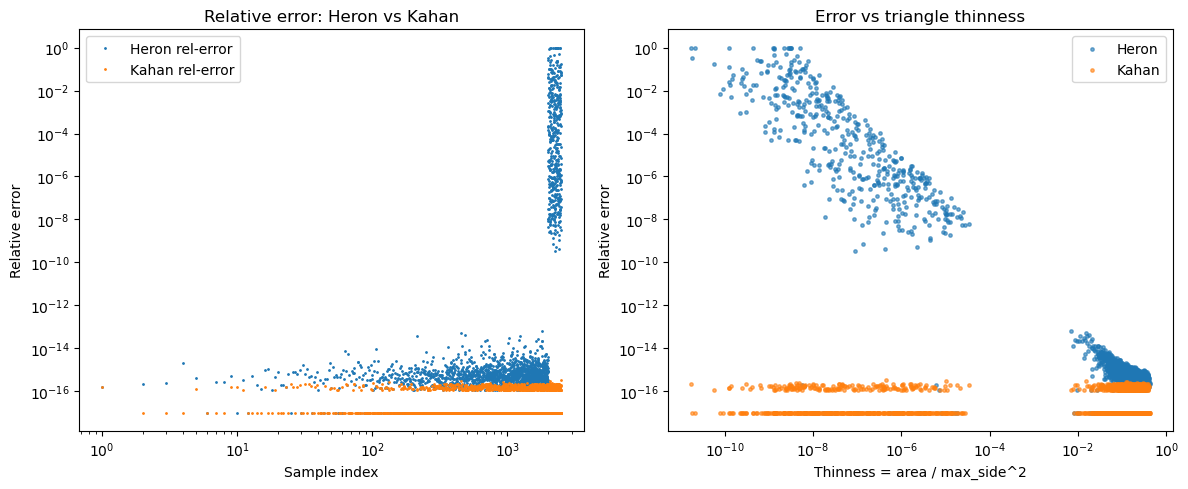


Sample comparisons (last 10):
2489: Heron=3.36577e-06, Kahan=3.14619e-06, cross=3.15135e-06, mp_ref=3.14619e-06, rel_H=6.979e-02, rel_K=1.000e-17
2490: Heron=6.60489e-08, Kahan=6.60504e-08, cross=6.63392e-08, mp_ref=6.60504e-08, rel_H=2.324e-05, rel_K=1.000e-17
2491: Heron=1.52164e-06, Kahan=1.83002e-06, cross=1.8283e-06, mp_ref=1.83002e-06, rel_H=1.685e-01, rel_K=1.157e-16
2492: Heron=1.29313e-07, Kahan=1.23044e-07, cross=1.21797e-07, mp_ref=1.23044e-07, rel_H=5.095e-02, rel_K=1.000e-17
2493: Heron=0.00219809, Kahan=0.00235559, cross=0, mp_ref=0.00235559, rel_H=6.686e-02, rel_K=1.841e-16
2494: Heron=0.000457647, Kahan=0.000457748, cross=0.000718994, mp_ref=0.000457748, rel_H=2.217e-04, rel_K=1.000e-17
2495: Heron=0.000160048, Kahan=0.000160048, cross=0.000160048, mp_ref=0.000160048, rel_H=8.971e-08, rel_K=3.387e-16
2496: Heron=0.00771606, Kahan=0.00771605, cross=0.00771605, mp_ref=0.00771605, rel_H=5.754e-07, rel_K=1.000e-17
2497: Heron=0.081253, Kahan=0.0812529, cross=0.0812529, mp_

In [8]:
if __name__ == "__main__":
    triangles = generate_triangles(n_random=2000, n_skinny=500)
    heron_vals = []
    kahan_vals = []
    cross_vals = []
    mp_vals = []
    rel_error_heron = []
    rel_error_kahan = []
    thinness = []

    print("Computing areas for {} triangles...".format(len(triangles)))

    for (a,b,c) in triangles:
        h = heron_area(a,b,c)
        k = kahan_area(a,b,c)
        cr = cross_area_from_sides(a,b,c)
        true = mp_true_area(a,b,c)
        true_f = float(true)
        if true_f == 0.0:
            continue
        heron_vals.append(h)
        kahan_vals.append(k)
        cross_vals.append(cr)
        mp_vals.append(true_f)
        rel_h = abs(h - true_f) / abs(true_f)
        rel_k = abs(k - true_f) / abs(true_f)
        rel_error_heron.append(rel_h)
        rel_error_kahan.append(rel_k)
        thin = true_f / (max(a,b,c)**2)
        thinness.append(thin)

    heron_vals = np.array(heron_vals)
    kahan_vals = np.array(kahan_vals)
    cross_vals = np.array(cross_vals)
    mp_vals = np.array(mp_vals)
    rel_error_heron = np.array(rel_error_heron)
    rel_error_kahan = np.array(rel_error_kahan)
    thinness = np.array(thinness)

    def stats(arr):
        return np.nanmin(arr), np.nanmedian(arr), np.nanmean(arr), np.nanmax(arr)

    print("\nRelative error statistics:")
    print("Heron rel-error (min, median, mean, max):", stats(rel_error_heron))
    print("Kahan rel-error (min, median, mean, max):", stats(rel_error_kahan))

    rel_error_heron[rel_error_heron < 1e-17] = 1e-17
    rel_error_kahan[rel_error_kahan < 1e-17] = 1e-17
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.loglog(rel_error_heron, '.', markersize=2, label='Heron rel-error')
    plt.loglog(rel_error_kahan, '.', markersize=2, label='Kahan rel-error')
    plt.xlabel('Sample index')
    plt.ylabel('Relative error')
    plt.title('Relative error: Heron vs Kahan')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(thinness, rel_error_heron, s=6, alpha=0.6, label='Heron')
    plt.scatter(thinness, rel_error_kahan, s=6, alpha=0.6, label='Kahan')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Thinness = area / max_side^2')
    plt.ylabel('Relative error')
    plt.title('Error vs triangle thinness')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("\nSample comparisons (last 10):")
    for i in range(max(len(mp_vals)-10,0),len(mp_vals)):
        print(f"{i:2d}: Heron={heron_vals[i]:.6g}, Kahan={kahan_vals[i]:.6g}, cross={cross_vals[i]:.6g}, mp_ref={mp_vals[i]:.6g}, rel_H={rel_error_heron[i]:.3e}, rel_K={rel_error_kahan[i]:.3e}")